Let's make sure our data files are there. The `os` library will be very helpful.

In [1]:
from os import listdir
from os.path import join

listdir('.')

['4_webapi.ipynb',
 '5_website.ipynb',
 '3_flights.ipynb',
 '2_straddle.ipynb',
 '1_basic.ipynb',
 '.ipynb_checkpoints']

In [2]:
listdir('../data')

['routes.csv', 'airports.csv']

We will rely on `pandas`'s built in `read_csv` function. 

In [3]:
import pandas as pd
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer,
    sep=',',
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal=b'.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    escapechar=None,
    comment=None,
    encoding=None,
    dialect=None,
    tupleize_cols=None,
    error_bad_lines=True,
    warn_bad_lines=True,
    delim_whitespace=False,
    

<hr>


What other "read" functions does `pandas` have?

In [4]:
import re
regex = re.compile(r'read')
list(filter(regex.match, dir(pd)))

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

Let's focus on `read_csv` for now, and investigate some data from [openflights.org](openflights.org)

In [5]:
routes = pd.read_csv(join('..', 'data', 'routes.csv'))
airports = pd.read_csv(join('..', 'data', 'airports.csv'))

In [6]:
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [7]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
airline       67663 non-null object
airline_id    67663 non-null object
source        67663 non-null object
source_id     67663 non-null object
dest          67663 non-null object
dest_id       67663 non-null object
codeshare     14597 non-null object
stops         67663 non-null int64
equipment     67645 non-null object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


<hr>
Looks like there's some missing data points...can we visualize what that looks like?

In [8]:
import missingno as msno

`missingno` is a library that wraps together handy data utilities to get a visual summary of data completeness. We will only scratch the surface of this library.

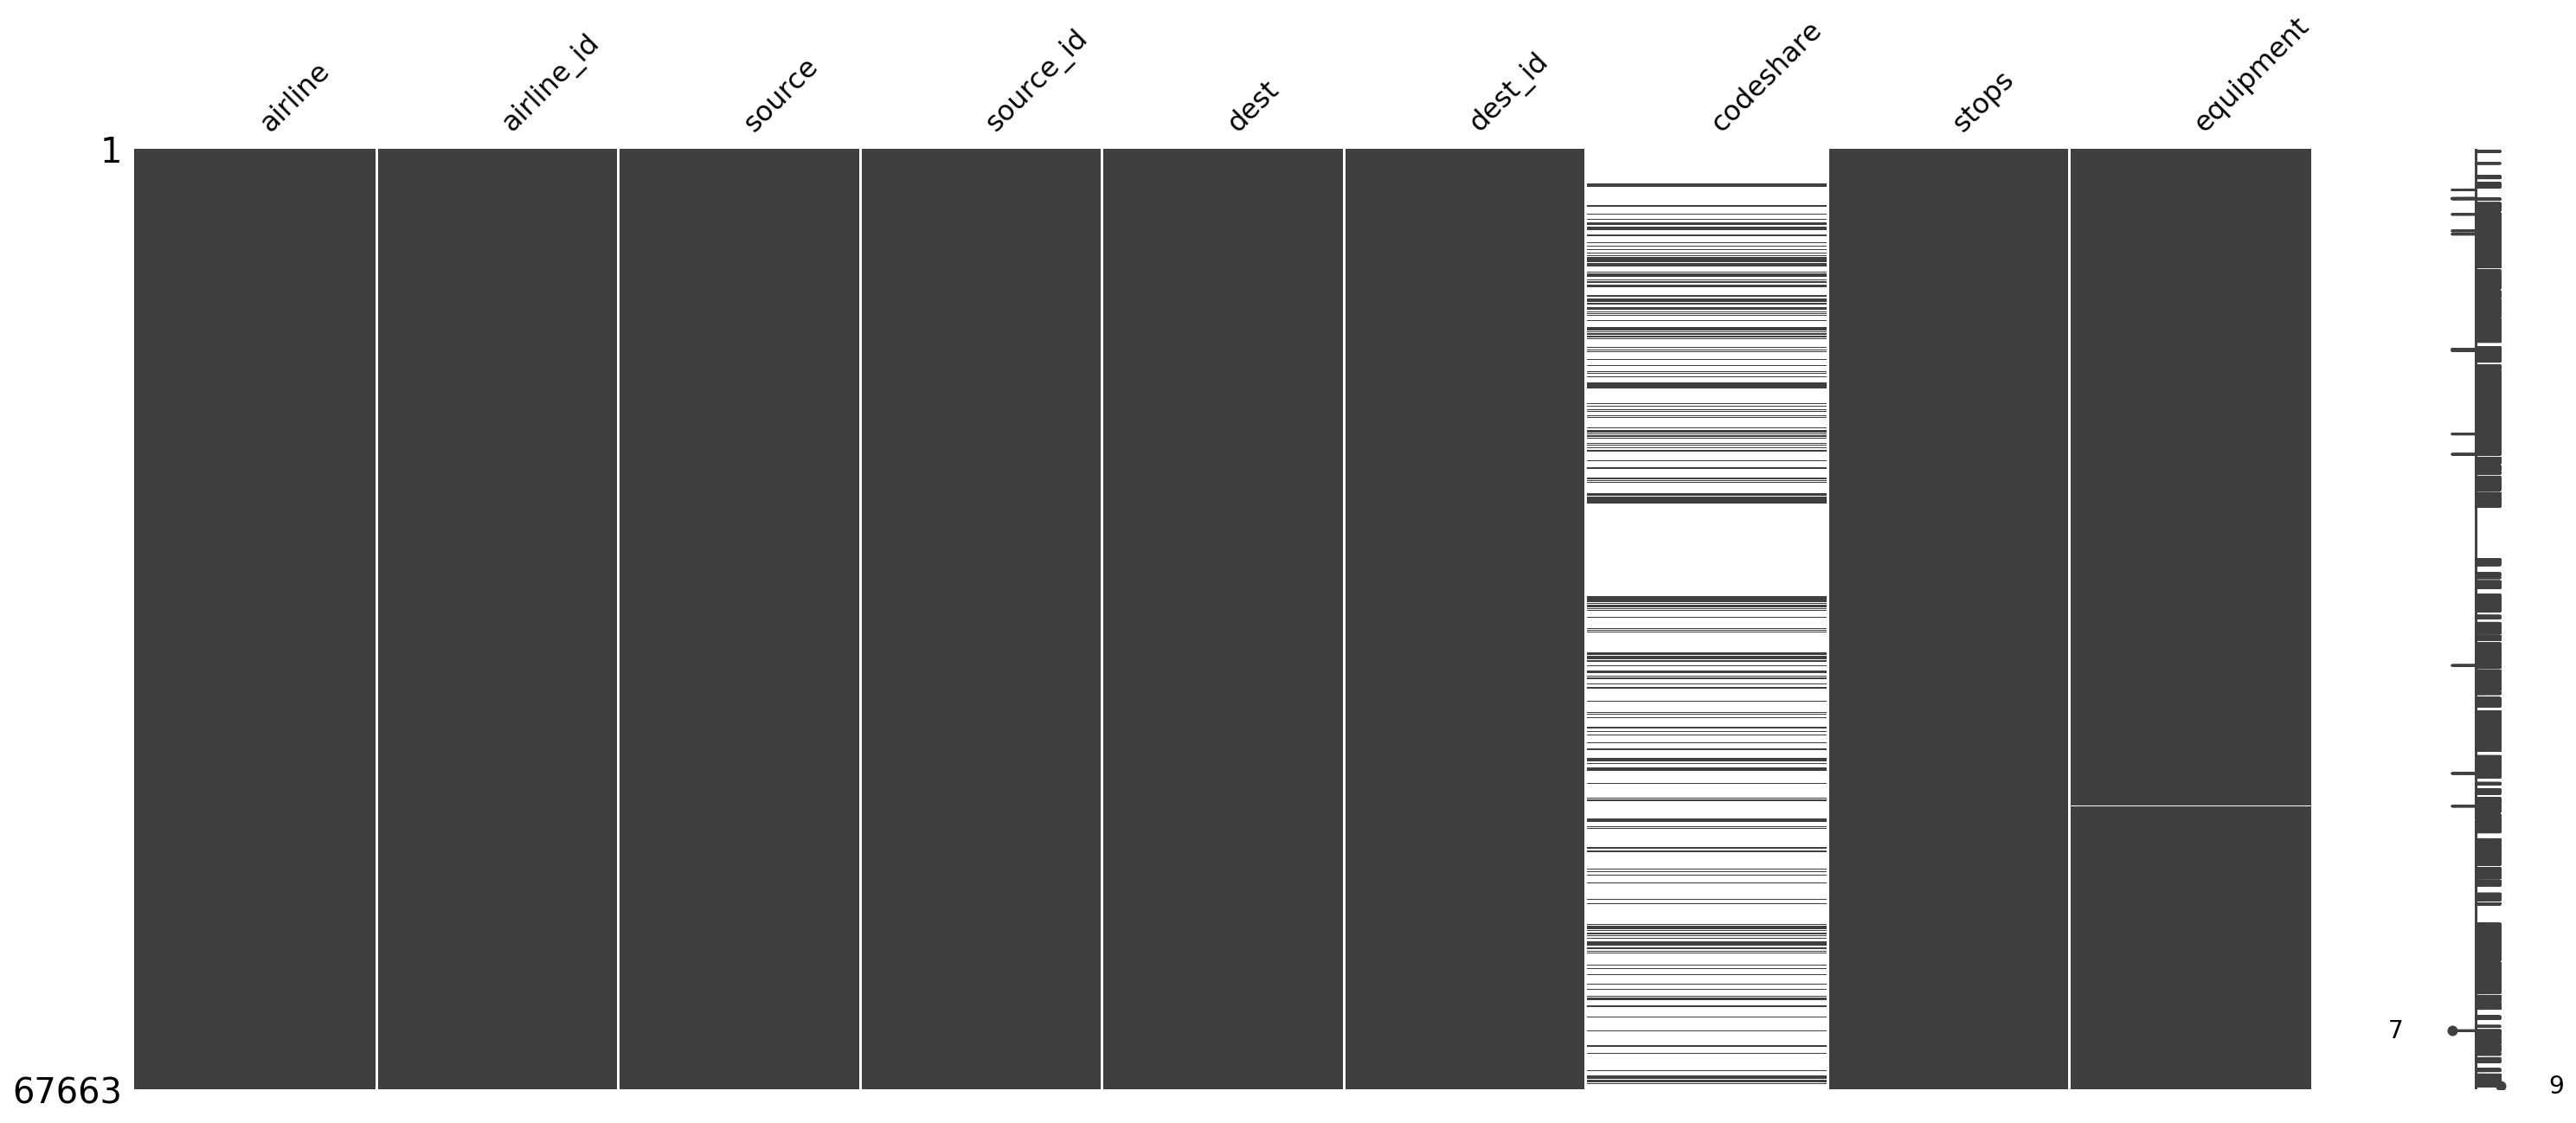

In [9]:
%matplotlib inline
msno.matrix(routes)

This gives a quick display to visually check out your data. The sparkline on the right shows the completeness of the data. Let's check out airports.

In [10]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
id          7698 non-null int64
name        7698 non-null object
city        7649 non-null object
country     7698 non-null object
IATA        7698 non-null object
ICAO        7698 non-null object
lat         7698 non-null float64
long        7698 non-null float64
altitude    7698 non-null int64
timezone    7698 non-null object
dst         7698 non-null object
tzinfo      7698 non-null object
type        7698 non-null object
source      7698 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 842.0+ KB


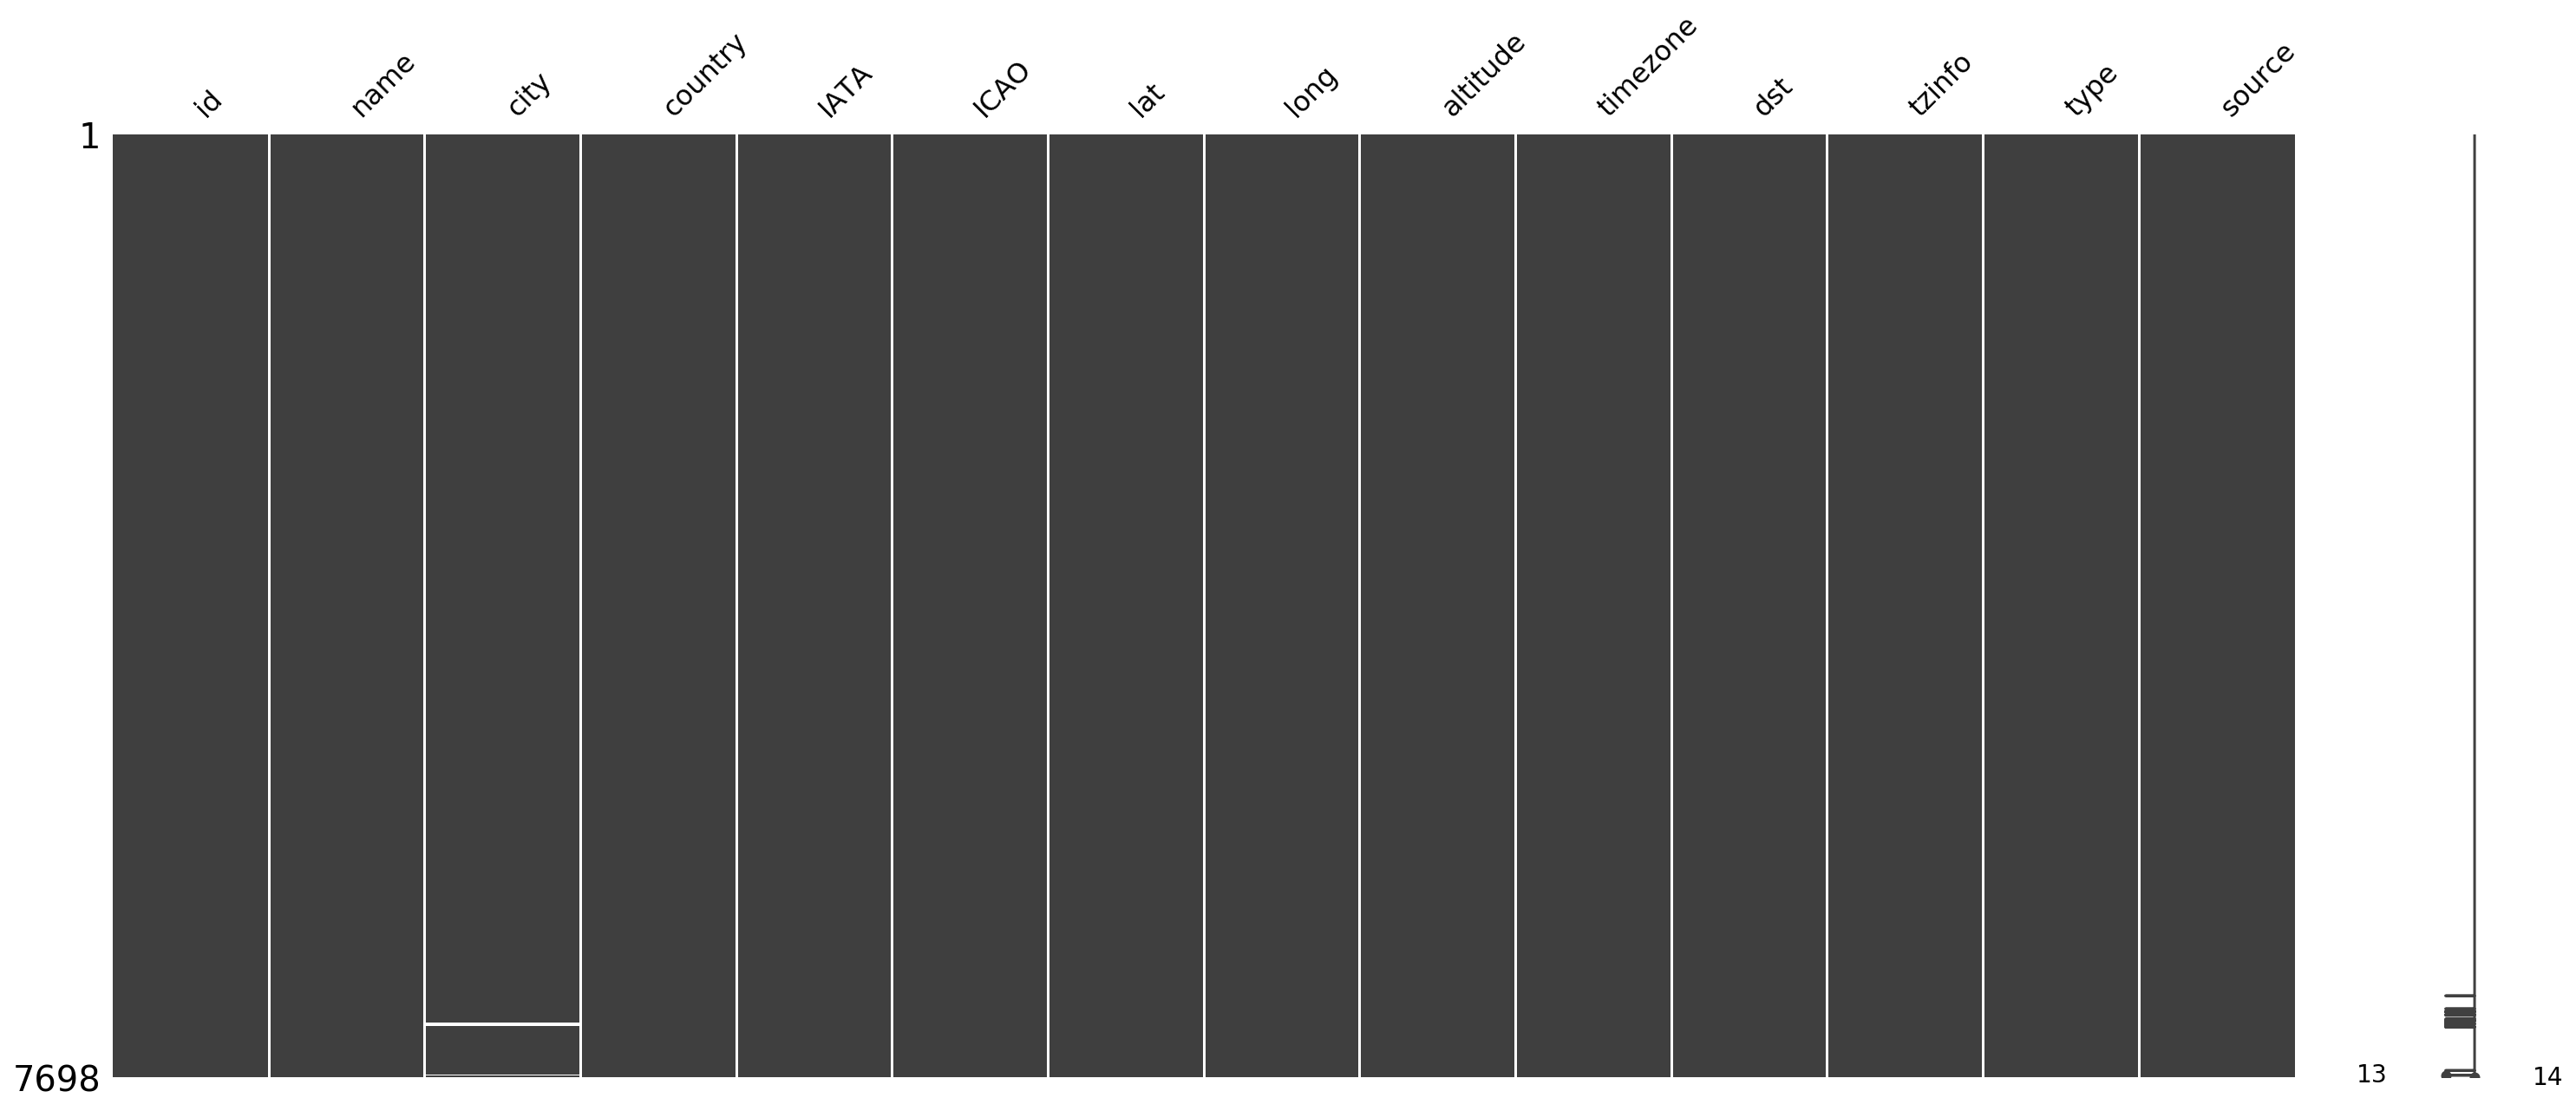

In [11]:
msno.matrix(airports)

Cool! Overall the csvs look pretty clean, with relatively complete data. We've got ~68000 airline routes and ~7000 airports around the world. Let's see if this list is real by traing to find everyone's favorite airport - LaGuardia (LGA).

In [12]:
airports[airports['IATA'] == 'LGA']

,id,name,city,country,IATA,ICAO,lat,long,altitude,timezone,dst,tzinfo,type,source
3497,3697,La Guardia Airport,New York,United States,LGA,KLGA,40.777199,-73.872597,21,-5,A,America/New_York,airport,OurAirports


Awesome. How about finding some other things like the highest airport in the world, highest airport in the country that comes last alphabetically, and the highest airport in Australia.

In [13]:
highest = airports.sort_values('altitude', ascending=False).iloc[0]
highestInLastAlpha = airports.sort_values(['country', 'altitude'], ascending=[False, False]).iloc[0]
highestInAustralia = airports[airports['country'] == 'Australia'].sort_values('altitude', ascending=False).iloc[0]

In [14]:
print(f'Highest airport: \n{highest}\n\n')
print(f'Highest airport in the country that comes last alphabetically: \n{highestInLastAlpha}\n\n')
print(f'Highest airport in Australia: \n{highestInAustralia}\n\n')

Highest airport: 
id                             9310
name        Daocheng Yading Airport
city                       Daocheng
country                       China
IATA                            DCY
ICAO                           ZUDC
lat                         29.3231
long                        100.053
altitude                      14472
timezone                          8
dst                               N
tzinfo                Asia/Shanghai
type                        airport
source                  OurAirports
Name: 6542, dtype: object


Highest airport in the country that comes last alphabetically: 
id                                                 1005
name        Robert Gabriel Mugabe International Airport
city                                             Harare
country                                        Zimbabwe
IATA                                                HRE
ICAO                                               FVHA
lat                                            -17

Let's do some more practical things with this data like finding the 10 busiest routes in the world.

In [15]:
busiest = routes.groupby(['source', 'dest']).count()['airline_id'].nlargest(10)
busiest

source  dest
ORD     ATL     20
ATL     ORD     19
HKT     BKK     13
ORD     MSY     13
ATL     MIA     12
AUH     MCT     12
BKK     HKG     12
CAN     HGH     12
DOH     BAH     12
HKG     BKK     12
Name: airline_id, dtype: int64

Merge in the names of the airports

In [16]:
busiest = pd.DataFrame(busiest).reset_index()
busiest.head()

,source,dest,airline_id
0,ORD,ATL,20
1,ATL,ORD,19
2,HKT,BKK,13
3,ORD,MSY,13
4,ATL,MIA,12


In [17]:
for sd in ['source', 'dest']:
    busiest = busiest.merge(airports[['IATA', 'name']].set_index('IATA'), how='left', left_on=sd, right_on='IATA')

busiest

,source,dest,airline_id,name_x,name_y
0,ORD,ATL,20,Chicago O'Hare International Airport,Hartsfield Jackson Atlanta International Airport
1,ATL,ORD,19,Hartsfield Jackson Atlanta International Airport,Chicago O'Hare International Airport
2,HKT,BKK,13,Phuket International Airport,Suvarnabhumi Airport
3,ORD,MSY,13,Chicago O'Hare International Airport,Louis Armstrong New Orleans International Airport
4,ATL,MIA,12,Hartsfield Jackson Atlanta International Airport,Miami International Airport
5,AUH,MCT,12,Abu Dhabi International Airport,Muscat International Airport
6,BKK,HKG,12,Suvarnabhumi Airport,Hong Kong International Airport
7,CAN,HGH,12,Guangzhou Baiyun International Airport,Hangzhou Xiaoshan International Airport
8,DOH,BAH,12,Hamad International Airport,Bahrain International Airport
9,HKG,BKK,12,Hong Kong International Airport,Suvarnabhumi Airport
